<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
# %pip install seaborn
# import piplite

# await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
# from pyodide.http import pyfetch

# async def download(url, filename):
    # response = await pyfetch(url)
    # if response.status == 200:
        # with open(filename, "wb") as f:
            # f.write(await response.bytes())

# path = URL

# await download(path, "dataset.csv")

---


# Test Environment


### Record of prompts used:
1. Write a python code to perform the following actions.
   * Import a data set from the URL 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv', assuming that the first        row of the file can be used as the headers for the data.

2. Write a Python code to perform the following actions.
   * Develops and trains a linear regression model that uses RAM_GB of the data frame as the source variable and Price as the target variable.
   * Calculate and display the MSE and R^2 values for the trained model.
  
3. Write a Python code for the following.
   * Develops and trains a linear regression model that uses the attributes 'CPU_core', 'CPU_frequency', and 'RAM_GB' as the source variables and 'Price' as the target variable.
   * Calculate and display the MSE and R^2 values for the trained model.
  
4. Write a python code that performs the following actions.
   * Develops and trains multiple polynomial regression models, with orders 2, 3, 4, and 5, that uses 'RAM_GB' as the source variable and 'Price' as the target variable.
   * Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean.
   * Compare the performance of the models.
  
5. Write a Python code that performs the following tasks.
   * Create a pipeline that performs parameter scaling, Polynomial Feature generation, and Linear regression. Use the set of multiple features as before to create this pipeline.
   * Calculate and display the MSE and R^2 values for the trained model.
  
6. Write a Python code that performs the following tasks.
   * Use polynomial features for some of the attributes of a data frame.
   * Perform Grid search on a ridge regression model for a set of values of hyperparameter alpha and polynomial features as input.
   * Use cross-validation in the Grid search.
   * Evaluate the resulting model's MSE and R^2 values.

In [7]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# Define the URL of the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

# Import the dataset into a Pandas DataFrame, using the first row as headers
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to verify the data
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the DataFrame 'df' is already loaded

# Define the source (X) and target (y) variables
X = df[['RAM_GB']]  # Source variable
y = df['Price']     # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R²) value
r2 = r2_score(y_test, y_pred)

# Display the MSE and R² values
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 223893.63813361502
R-squared (R²): 0.02850958189814512


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the DataFrame 'df' is already loaded

# Define the source (X) and target (y) variables
X = df[['CPU_core', 'CPU_frequency', 'RAM_GB']]  # Source variables
y = df['Price']                                  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R²) value
r2 = r2_score(y_test, y_pred)

# Display the MSE and R² values
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 196802.10642549582
R-squared (R²): 0.14606166459927872


Polynomial Order: 2
Mean Squared Error (MSE): 227345.50447559214
R-squared (R²): 0.30853197675192645

Polynomial Order: 3
Mean Squared Error (MSE): 225478.14240080043
R-squared (R²): 0.31421153116195555

Polynomial Order: 4
Mean Squared Error (MSE): 223544.1051863433
R-squared (R²): 0.3200938770330719

Polynomial Order: 5
Mean Squared Error (MSE): 223544.1051863433
R-squared (R²): 0.3200938770330719



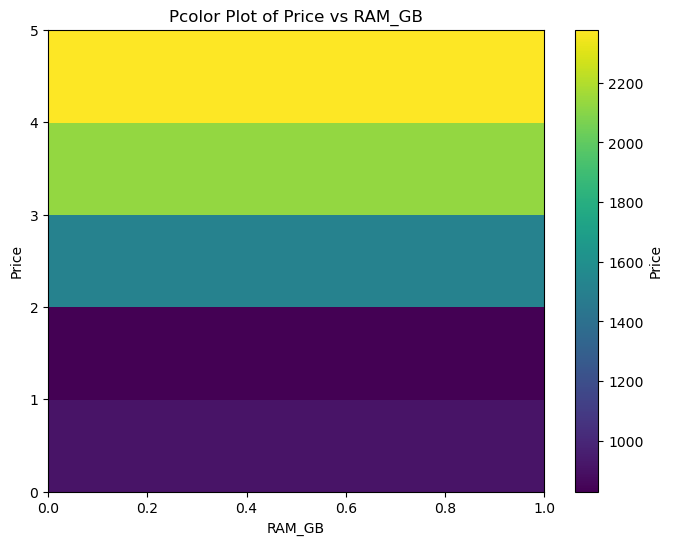

Performance Comparison of Polynomial Regression Models:
   Polynomial Order            MSE  R-squared
0                 2  227345.504476   0.308532
1                 3  225478.142401   0.314212
2                 4  223544.105186   0.320094
3                 5  223544.105186   0.320094


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the DataFrame 'df' is already loaded

# Define the source (X) and target (y) variables
X = df[['RAM_GB']]  # Source variable
y = df['Price']     # Target variable

# Initialize lists to store MSE and R² values for each model
mse_values = []
r2_values = []

# Loop through polynomial orders 2, 3, 4, and 5
for degree in [2, 3, 4, 5]:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict using the polynomial model
    y_pred = model.predict(X_poly)
    
    # Calculate the Mean Squared Error (MSE) and R² values
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Store the MSE and R² values
    mse_values.append((degree, mse))
    r2_values.append((degree, r2))
    
    # Print performance metrics for the current model
    print(f'Polynomial Order: {degree}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R²): {r2}\n')

# Create a pivot table using 'RAM_GB' as index, 'Price' as values, and mean as aggregation function
pivot_table = df.pivot_table(values='Price', index='RAM_GB', aggfunc='mean')

# Plot the pivot table (as an example visualization, not required for model comparison)
plt.figure(figsize=(8, 6))
plt.pcolor(pivot_table, cmap='viridis')
plt.colorbar(label='Price')
plt.xlabel('RAM_GB')
plt.ylabel('Price')
plt.title('Pcolor Plot of Price vs RAM_GB')
plt.show()

# Display the performance comparison for the models
performance_comparison = pd.DataFrame({
    'Polynomial Order': [2, 3, 4, 5],
    'MSE': [mse[1] for mse in mse_values],
    'R-squared': [r2[1] for r2 in r2_values]
})

print("Performance Comparison of Polynomial Regression Models:")
print(performance_comparison)

In [40]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming the DataFrame 'df' is already loaded

# Define the source (X) and target (y) variables
X = df[['CPU_core', 'CPU_frequency', 'RAM_GB']]  # Multiple features
y = df['Price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Parameter scaling
    ('poly', PolynomialFeatures(degree=2)),  # Polynomial feature generation
    ('regressor', LinearRegression())  # Linear regression
])

# Train the pipeline model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R² values
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 180601.51396914176
R-squared (R²): 0.21635718737571696


In [42]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming the DataFrame 'df' is already loaded

# Define the source (X) and target (y) variables
X = df[['CPU_core', 'CPU_frequency', 'RAM_GB']]  # Multiple features
y = df['Price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial feature generation
    ('ridge', Ridge())  # Ridge regression
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly__degree': [2, 3, 4, 5],  # Polynomial degrees to try
    'ridge__alpha': [0.1, 1, 10, 100]  # Values of alpha to try
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the GridSearchCV model
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Best Parameters: {'poly__degree': 2, 'ridge__alpha': 10}
Mean Squared Error (MSE): 181935.46586778192
R-squared (R²): 0.21056907522326573


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
